1.1 Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

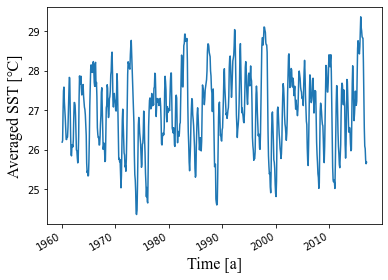

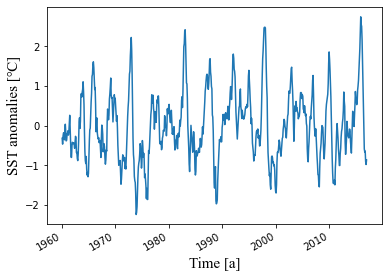

In [3]:
# Open a netCDF4 file and see it
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")

#Read variables
time = ds['time'][:]
lat = ds['lat'][:]
lon = ds['lon'][:]
sst = ds['sst'][:,:,:]

#Select the Nino 3.4 region(5N-5S,170W-120W)
region34 = sst.sel(time=slice('1960','2016')).sel(lat=slice(-5.5,4.5)).sel(lon=slice(190.5,240.5))
region34_mean = np.mean(region34,axis=(1,2))
region34_mean.plot()
plt.xlabel('Time [a]', fontfamily='Times new roman', size='16')
plt.ylabel('Averaged SST [℃]', fontfamily='Times new roman', size='16')
plt.show()

# Calculate the climatology 
sst_clim = region34_mean.groupby('time.month').mean()

# Obtain anomalies
# Group data by month
group_data = region34_mean.groupby('time.month')

# Apply mean to grouped data, and then compute the anomaly 
sst_anom = group_data - group_data.mean(dim='time')

#Plot sst_anom
sst_anom.plot()
plt.xlabel('Time [a]', fontfamily='Times new roman', size='15')
plt.ylabel("SST anomalies [℃]", fontfamily='Times new roman', size='15')
plt.show()

1.2 Visualize the computed Niño 3.4. Your plot should look similar to this one.

<Figure size 864x288 with 0 Axes>

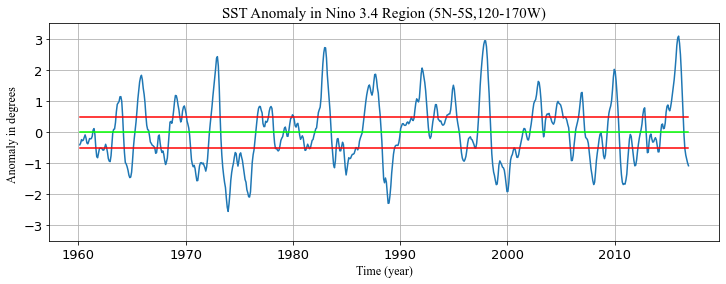

In [4]:
#Set the time
ctime = time.sel(time=slice('1960','2016'))
xtime = ctime.isel(time=np.arange(1,57*12-1)).values

#Calculate Nino 3.4 index
nstep = int(57*12-2)
Nino34_index = np.zeros(nstep)
Nino34_ul = np.zeros(nstep)
Nino34_dl = np.zeros(nstep)
Nino34_0 = np.zeros(nstep)
for i in range(0,nstep):
    Nino34_index[i] = np.mean(sst_anom[i:i+3]) 
    Nino34_ul[i] = 0.5
    Nino34_dl[i] = -0.5
    Nino34_0[i] = 0.0

# Make the time series match the data
xtime = ctime.isel(time=np.arange(1,57*12-1)).values
# Normalize the smoothed values by its standard deviation over the period.
Nino34_index_oni = Nino34_index / np.std(Nino34_index)
fig = plt.figure(figsize=(12,4))
plt.rcParams['figure.figsize'] = (12,4)
fig, ax = plt.subplots()
ax.plot(xtime,Nino34_index_oni)
ax.tick_params(axis='both',labelsize=13)
ax.set_ylim(-3.5,3.5)
ax.set_xlabel('Time (year)',fontsize=12, fontfamily='Times new roman')
ax.set_ylabel('Anomaly in degrees ',fontsize=12, fontfamily='Times new roman')
ax.set_title('SST Anomaly in Nino 3.4 Region (5N-5S,120-170W)',fontsize=15, fontfamily='Times new roman')
ax.grid()
plt.savefig('A6-T1.png',bbox_inches='tight')
plt.plot(xtime,Nino34_ul,'red')
plt.plot(xtime,Nino34_dl,'red')
plt.plot(xtime,Nino34_0,'lime')
plt.show()


2.1 Make a 2D plot of the time-mean TOA longwave, shortwave, and solar radiation for all-sky conditions. Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux.

In [5]:
# Load modules
import numpy as np
import math
import pandas as pd
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Show plots in the notebook
%matplotlib inline

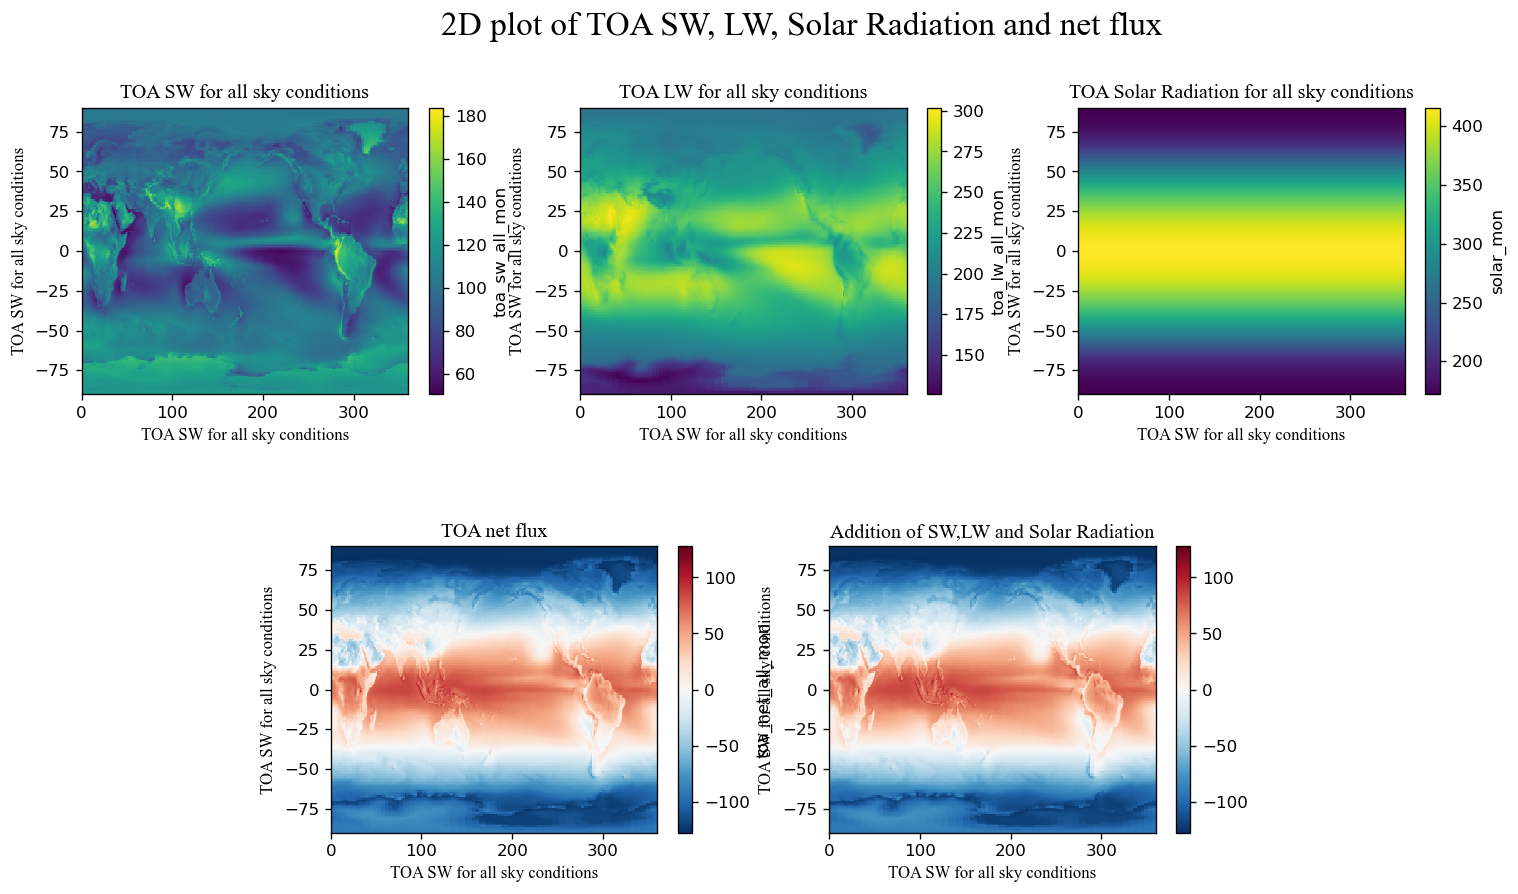

In [6]:
# Open a netCDF4 file and see it
ds = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")

#Read variables
time = ds['time'][:]
lat = ds['lat'][:]
lon = ds['lon'][:]
sw1 = ds['toa_sw_all_mon'][:,:,:]
lw1 = ds['toa_lw_all_mon'][:,:,:]
so1 = ds['solar_mon'][:,:,:]
net1 = ds['toa_net_all_mon'][:,:,:]
#Calculate the mean and draw the 2D plot
sw1_mean = np.mean(sw1,axis=0)
lw1_mean = np.mean(lw1,axis=0)
so1_mean = np.mean(so1,axis=0)
net1_mean = np.mean(net1,axis=0)
new_mean = so1_mean-sw1_mean-lw1_mean

#Define the fields
fields = {0:'TOA SW for all sky conditions', 
          1:'TOA LW for all sky conditions', 
          2:'TOA Solar Radiation for all sky conditions', 
          3:'TOA net flux',
          4:'Addition of SW,LW and Solar Radiation'}

# Set the subgrids
fig = plt.figure(figsize=(16,8), dpi=120)
grid = plt.GridSpec(20, 36)  

# Fig.1
plt.subplot(grid[0:8,0:10]) 
sw1_mean.plot()  
plt.title(fields[0], fontfamily='Times new roman')
plt.xlabel(fields[0], fontfamily='Times new roman')
plt.ylabel(fields[0], fontfamily='Times new roman')

# Fig.2
plt.subplot(grid[0:8,12:22])  
lw1_mean.plot()    
plt.title(fields[1], fontfamily='Times new roman')
plt.xlabel(fields[0], fontfamily='Times new roman')
plt.ylabel(fields[0], fontfamily='Times new roman')

# Fig.3
plt.subplot(grid[0:8,24:34]) 
so1_mean.plot()   
plt.title(fields[2], fontfamily='Times new roman')
plt.xlabel(fields[0], fontfamily='Times new roman')
plt.ylabel(fields[0], fontfamily='Times new roman')

# Fig.4
plt.subplot(grid[12:20,6:16]) 
net1_mean.plot()   
plt.title(fields[3], fontfamily='Times new roman')
plt.xlabel(fields[0], fontfamily='Times new roman')
plt.ylabel(fields[0], fontfamily='Times new roman')

# Fig.5
plt.subplot(grid[12:20,18:28]) 
new_mean.plot()   
plt.title(fields[4], fontfamily='Times new roman')
plt.xlabel(fields[0], fontfamily='Times new roman')
plt.ylabel(fields[0], fontfamily='Times new roman')

# Plot super title
plt.suptitle('2D plot of TOA SW, LW, Solar Radiation and net flux', verticalalignment='top', fontsize=20, fontfamily='Times new roman')   

# Show plot
plt.show()

2.2 Calculate and verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with the cartoon above.[Hint: Consider calculating the area of each grid]

In [7]:
#import radius of earth and calculate the area of each grid
R=6371 #[km]
delta_phi=2*(math.pi)*R*(np.cos(lat*(math.pi)/180))/360
area=delta_phi*2*(math.pi)*R/360
area

<xarray.DataArray 'lat' (lat: 180)>
array([  107.89793,   323.66055,   539.323  ,   754.82275,   970.09265,
        1185.0653 ,  1399.6786 ,  1613.8658 ,  1827.5624 ,  2040.6997 ,
        2253.2166 ,  2465.046  ,  2676.1272 ,  2886.3904 ,  3095.7754 ,
        3304.218  ,  3511.6528 ,  3718.02   ,  3923.2527 ,  4127.2915 ,
        4330.0728 ,  4531.535  ,  4731.617  ,  4930.2563 ,  5127.3965 ,
        5322.9727 ,  5516.928  ,  5709.2036 ,  5899.739  ,  6088.4785 ,
        6275.3623 ,  6460.335  ,  6643.339  ,  6824.3213 ,  7003.223  ,
        7179.992  ,  7354.574  ,  7526.9146 ,  7696.9644 ,  7864.6694 ,
        8029.9775 ,  8192.84   ,  8353.207  ,  8511.03   ,  8666.26   ,
        8818.851  ,  8968.754  ,  9115.927  ,  9260.322  ,  9401.896  ,
        9540.607  ,  9676.411  ,  9809.269  ,  9939.137  , 10065.978  ,
       10189.754  , 10310.423  , 10427.953  , 10542.309  , 10653.45   ,
       10761.349  , 10865.97   , 10967.277  , 11065.246  , 11159.845  ,
       11251.045  , 11338.816  , 11423.134  , 11503.973  , 11581.307  ,
       11655.114  , 11725.369  , 11792.053  , 11855.1455 , 11914.626  ,
       11970.4795 , 12022.685  , 12071.228  , 12116.095  , 12157.27   ,
       12194.743  , 12228.501  , 12258.535  , 12284.832  , 12307.389  ,
       12326.196  , 12341.249  , 12352.545  , 12360.073  , 12363.84   ,
       12363.84   , 12360.073  , 12352.545  , 12341.249  , 12326.196  ,
       12307.389  , 12284.832  , 12258.535  , 12228.501  , 12194.743  ,
       12157.27   , 12116.095  , 12071.228  , 12022.685  , 11970.4795 ,
       11914.626  , 11855.1455 , 11792.053  , 11725.369  , 11655.114  ,
       11581.307  , 11503.973  , 11423.134  , 11338.816  , 11251.045  ,
       11159.845  , 11065.246  , 10967.277  , 10865.97   , 10761.349  ,
       10653.45   , 10542.309  , 10427.953  , 10310.423  , 10189.754  ,
       10065.978  ,  9939.137  ,  9809.269  ,  9676.411  ,  9540.607  ,
        9401.896  ,  9260.322  ,  9115.927  ,  8968.754  ,  8818.851  ,
        8666.26   ,  8511.03   ,  8353.207  ,  8192.84   ,  8029.9775 ,
        7864.6694 ,  7696.9644 ,  7526.9146 ,  7354.574  ,  7179.992  ,
        7003.223  ,  6824.3213 ,  6643.339  ,  6460.335  ,  6275.3623 ,
        6088.4785 ,  5899.739  ,  5709.2036 ,  5516.928  ,  5322.9727 ,
        5127.3965 ,  4930.2563 ,  4731.617  ,  4531.535  ,  4330.0728 ,
        4127.2915 ,  3923.2527 ,  3718.02   ,  3511.6528 ,  3304.218  ,
        3095.7754 ,  2886.3904 ,  2676.1272 ,  2465.046  ,  2253.2166 ,
        2040.6997 ,  1827.5624 ,  1613.8658 ,  1399.6786 ,  1185.0653 ,
         970.09265,   754.82275,   539.323  ,   323.66055,   107.89793],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

In [8]:
# For grids in different latitudes, the area is different. Calculate the total surface area of the earth
Total_surface_area=area.sum()*360
Total_surface_area

<xarray.DataArray 'lat' ()>
array(5.1007086e+08)

In [9]:
#Calculate the TOA outgoing shortwave
sw_lat=sw1_mean*area*1e6
outgoing_sw=sw_lat.sum()/Total_surface_area/1e6
outgoing_sw

<xarray.DataArray ()>
array(99.13904888)

In [10]:
#Calculate the TOA outgoing shortwave
sw_lat=sw1_mean*area*1e6
outgoing_sw=sw_lat.sum()/Total_surface_area/1e6
outgoing_sw

<xarray.DataArray ()>
array(99.13904888)

2.3 Calculate and plot the total amount of net radiation in each 1-degree latitude band. Label with correct units.

In [11]:
#Calculate the TOA incoming solar
solar_lat = so1_mean*area*1e6
incoming_solar = solar_lat.sum()/Total_surface_area/1e6
incoming_solar

<xarray.DataArray ()>
array(340.28518782)

In [12]:
#Calculate the net radiation
net_ra = so1_mean-lw1_mean-sw1_mean
net_ra      #unit:W/m^2

<xarray.DataArray (lat: 180, lon: 360)>
array([[ -91.28782,  -91.28782,  -91.28782, ...,  -91.28782,  -91.28782,
         -91.28782],
       [ -91.45692,  -91.45692,  -91.45692, ...,  -91.45692,  -91.45692,
         -91.45692],
       [ -91.82563,  -91.82563,  -91.82563, ...,  -91.82563,  -91.82563,
         -91.82563],
       ...,
       [-125.81955, -125.81955, -125.81955, ..., -125.81955, -125.81955,
        -125.81955],
       [-125.93744, -125.93744, -125.93744, ..., -125.93744, -125.93744,
        -125.93744],
       [-126.26439, -126.26439, -126.26439, ..., -126.26439, -126.26439,
        -126.26439]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

In [13]:
#Calculate the total amount of net radiation in each 1-degree latitude band
net_ra_band = net_ra*area*1e6
Total_net_ra_band = np.sum(net_ra_band,axis=1)#unit:W
Total_net_ra_band

<xarray.DataArray (lat: 180)>
array([-3.54591598e+12, -1.06014808e+13, -1.80168132e+13, -2.57574935e+13,
       -3.40754484e+13, -4.28637652e+13, -5.13862722e+13, -5.96585805e+13,
       -6.78450566e+13, -7.54502609e+13, -8.31853209e+13, -9.05216199e+13,
       -9.70058294e+13, -1.04933811e+14, -1.14619348e+14, -1.23338307e+14,
       -1.31963927e+14, -1.42516880e+14, -1.53245775e+14, -1.62030779e+14,
       -1.69188996e+14, -1.76487337e+14, -1.82779967e+14, -1.84845863e+14,
       -1.84175546e+14, -1.82979683e+14, -1.79744516e+14, -1.77398457e+14,
       -1.75145109e+14, -1.72412872e+14, -1.66473973e+14, -1.62331577e+14,
       -1.58036711e+14, -1.53722382e+14, -1.49650200e+14, -1.45159761e+14,
       -1.39039039e+14, -1.33984340e+14, -1.28509716e+14, -1.22198061e+14,
       -1.16206665e+14, -1.09612162e+14, -1.01963631e+14, -9.37626341e+13,
       -8.49671535e+13, -7.64731342e+13, -6.70242984e+13, -5.72006009e+13,
       -4.71604019e+13, -3.68991126e+13, -2.67247356e+13, -1.71018058e+13,
       -6.17620649e+12,  5.96565767e+12,  1.68855591e+13,  2.63168815e+13,
        3.51104747e+13,  4.49699643e+13,  5.22472202e+13,  6.03073429e+13,
        6.85862069e+13,  7.59658080e+13,  8.36735211e+13,  9.19149174e+13,
        9.97603966e+13,  1.05552076e+14,  1.12839730e+14,  1.19948488e+14,
        1.27713050e+14,  1.36135817e+14,  1.46904743e+14,  1.56408314e+14,
        1.65011536e+14,  1.75317646e+14,  1.87105100e+14,  1.98255808e+14,
        2.09195912e+14,  2.19156545e+14,  2.30511633e+14,  2.40933472e+14,
...
        2.16284420e+14,  1.93760940e+14,  1.74419041e+14,  1.54374295e+14,
        1.35123924e+14,  1.22778099e+14,  1.12936903e+14,  1.02643897e+14,
        9.28942203e+13,  8.42303485e+13,  7.53606202e+13,  6.44833220e+13,
        5.57953078e+13,  4.22207910e+13,  3.56622837e+13,  2.93774735e+13,
        2.19264162e+13,  2.33774567e+13,  2.18754617e+13,  1.93226196e+13,
        1.26189547e+13,  4.92111344e+12, -2.31725623e+12, -1.20537901e+13,
       -2.26334731e+13, -3.43088761e+13, -4.42933644e+13, -5.29797638e+13,
       -6.20353081e+13, -7.26829011e+13, -8.18692405e+13, -9.03111833e+13,
       -9.84633836e+13, -1.06769104e+14, -1.14104094e+14, -1.19533688e+14,
       -1.25045154e+14, -1.30818882e+14, -1.35596345e+14, -1.39365196e+14,
       -1.42507652e+14, -1.46298229e+14, -1.50735400e+14, -1.52815909e+14,
       -1.53192088e+14, -1.54112050e+14, -1.58312813e+14, -1.59915558e+14,
       -1.59964648e+14, -1.59674620e+14, -1.59833114e+14, -1.60286032e+14,
       -1.58478186e+14, -1.57355019e+14, -1.56078910e+14, -1.54075811e+14,
       -1.51029069e+14, -1.48479737e+14, -1.45202812e+14, -1.40207546e+14,
       -1.34207754e+14, -1.27355276e+14, -1.20557467e+14, -1.13382473e+14,
       -1.05990842e+14, -9.75695522e+13, -8.90333299e+13, -7.99767454e+13,
       -7.14593303e+13, -6.28548583e+13, -5.34981252e+13, -4.38571022e+13,
       -3.41336696e+13, -2.44313468e+13, -1.46782007e+13, -4.90451973e+12],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

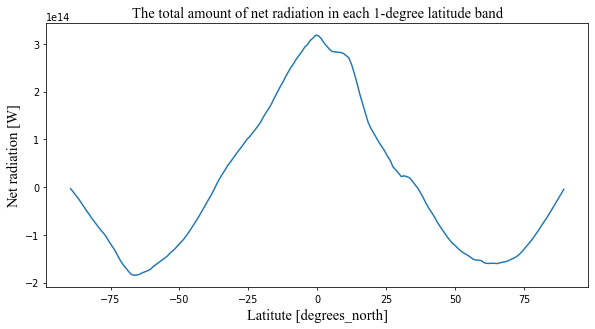

In [14]:
#Plot the total amount of net radiation in each 1-degree latitude band
fig = plt.figure(figsize=(10,5), dpi=70)
Total_net_ra_band.plot()
plt.title("The total amount of net radiation in each 1-degree latitude band", fontsize=15, fontfamily='Times new roman')
plt.xlabel('Latitute [degrees_north]', fontfamily='Times new roman',  fontsize=15)
plt.ylabel('Net radiation [W]', fontfamily='Times new roman', fontsize=15)
plt.show()

2.4 Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions. Here we define low cloud area as ≤25% and high cloud area as ≥75%. Your results should be 2D maps

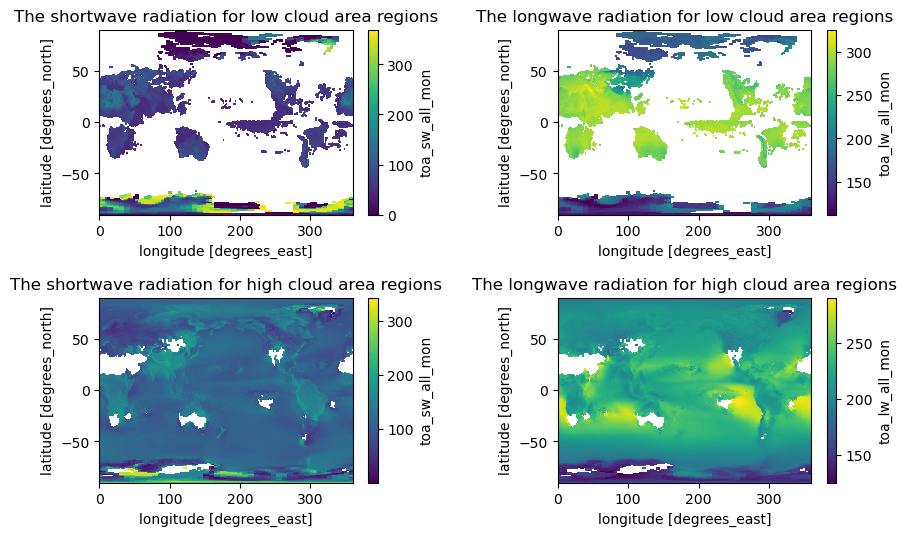

In [15]:
fra = ds['cldarea_total_daynight_mon'][:,:,:]
#Calculate the composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions
#The outgoing shortwave radiation for low cloud area regions
sw_l = sw1.where(fra<=25).mean(axis=0)
sw_l

#Calculate the composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions
#The outgoing longwave radiation for low cloud area regions
lw_l = lw1.where(fra<=25).mean(axis=0)
lw_l

#Calculate the composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions
#the outgoing shortwave radiation for high cloud area regions
sw_h = sw1.where(fra>=75).mean(axis=0)
sw_h

#Calculate the composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions
#The outgoing longwave radiation for high cloud area regions
lw_h=lw1.where(fra>=75).mean(axis=0)
lw_h

#Plot the composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions
#Define the fields
fields = {0:'The shortwave radiation for low cloud area regions', 
          1:'The longwave radiation for low cloud area regions', 
          2:'The shortwave radiation for high cloud area regions', 
          3:'The longwave radiation for high cloud area regions'}

# Set the subgrids
fig = plt.figure(figsize=(10,6), dpi=100)
grid = plt.GridSpec(12, 12)  # 4 rows 4 cols

# Plot each axes
plt.subplot(grid[0:5,0:5]) 
sw_l.plot()  
plt.title(fields[0])

# Plot each axes
plt.subplot(grid[0:5,7:12]) 
lw_l.plot()  
plt.title(fields[1])

# Plot each axes
plt.subplot(grid[7:12,0:5]) 
sw_h.plot()  
plt.title(fields[2])

# Plot each axes
plt.subplot(grid[7:12,7:12]) 
lw_h.plot()  
plt.title(fields[3])
plt.show()

2.5 Calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions. What is the overall effect of clouds on shortwave and longwave radiation?

In [16]:
#Calculate the global mean values of shortwave radiation, composited in low cloud regions
sw_l_lat = sw_l*area*1e6
sw_l_gm = sw_l_lat.sum()/Total_surface_area/1e6
sw_l_gm

<xarray.DataArray ()>
array(19.65188625)

In [17]:
#Calculate the global mean values of longwave radiation, composited in low cloud regions
lw_l_lat = lw_l*area*1e6
lw_l_gm = lw_l_lat.sum()/Total_surface_area/1e6
lw_l_gm

<xarray.DataArray ()>
array(70.50560434)

In [18]:
#Calculate the global mean values of shortwave radiation, composited in high cloud regions
sw_h_lat = sw_h*area*1e6
sw_h_gm = sw_h_lat.sum()/Total_surface_area/1e6
sw_h_gm

<xarray.DataArray ()>
array(104.54761502)

In [19]:
#Calculate the global mean values of longwave radiation, composited in high cloud regions
lw_h_lat = lw_h*area*1e6
lw_h_gm = lw_h_lat.sum()/Total_surface_area/1e6
lw_h_gm

<xarray.DataArray ()>
array(208.53531147)

3.1 Plot a time series of a certain variable with monthly seasonal cycle removed.

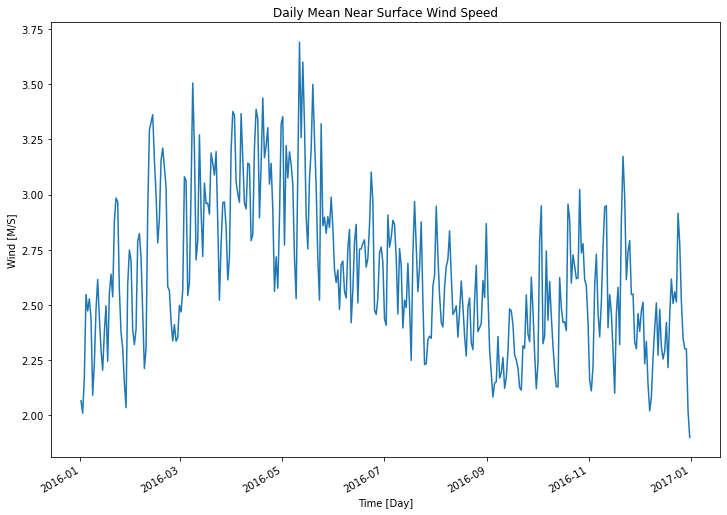

In [20]:
ds = xr.open_dataset("wind_ITPCAS-CMFD_V0106_B-01_01dy_010deg_201601-201612.nc", engine='netcdf4')
time = ds['time']
lat = ds['lat']
lon = ['lon']
wind = ds['wind']
ds.wind.mean(dim=('lon', 'lat')).sel(time=slice("2016-01", "2016-12")).plot(size=8)
plt.title("Daily Mean Near Surface Wind Speed")
plt.xlabel('Time [Day]')
plt.ylabel('Wind [M/S]')
plt.show()

3.2 Make at least 5 different plots using the dataset.

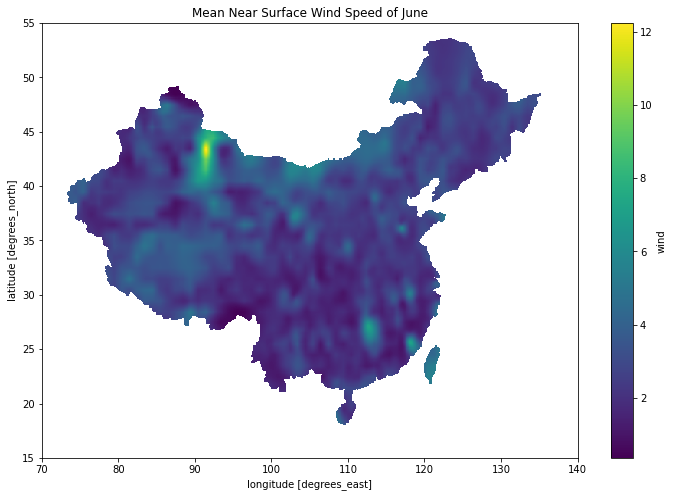

In [21]:
#fig.1
ds = xr.open_dataset("wind_ITPCAS-CMFD_V0106_B-01_01dy_010deg_201601-201612.nc", engine='netcdf4')
wind = ds['wind']
time = ds['time']
lat = ds['lat']
lon = ds['lon']

wind_1 = ds.wind.groupby('time.month').mean()
wind_1.sel(month=6).plot(size=8)
plt.title('Mean Near Surface Wind Speed of June')
plt.show()

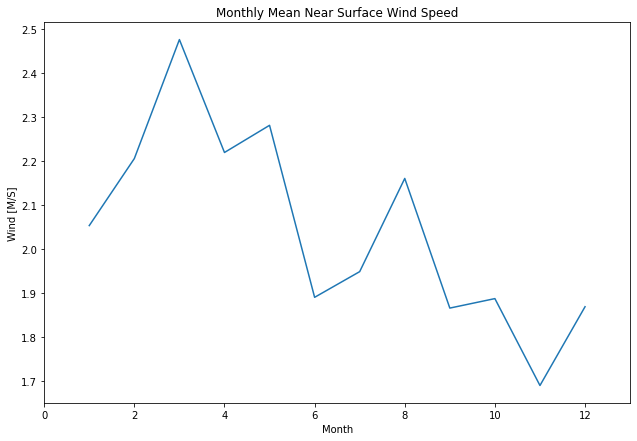

In [22]:
#fig.2
wind_2 = ds.wind.groupby('time.month').mean()
wind_2.sel(lon=112, lat=34, method='nearest').plot(size=7)
plt.title('Monthly Mean Near Surface Wind Speed')
plt.xlabel('Month')
plt.ylabel('Wind [M/S]')
plt.xlim(0,13,1)
plt.show()

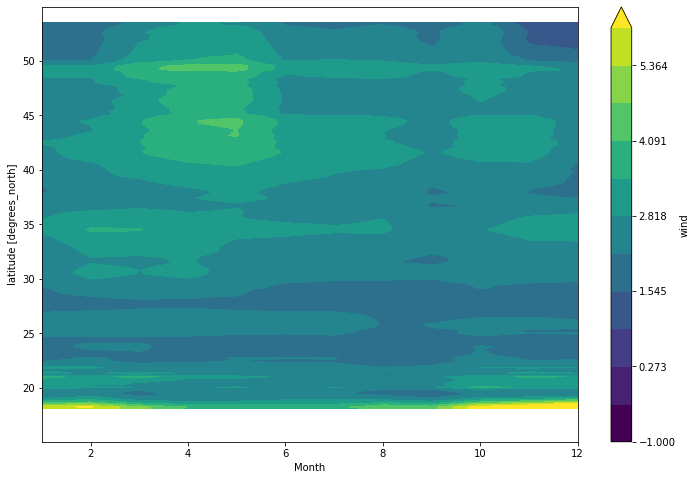

In [23]:
#fig.3 monthly 
wind_3 = ds.wind.groupby('time.month').mean()
wind_3.mean(dim='lon').plot.contourf(x='month', levels=12, vmin=-1, vmax=6, size=8)
plt.xlabel('Month')
plt.show()

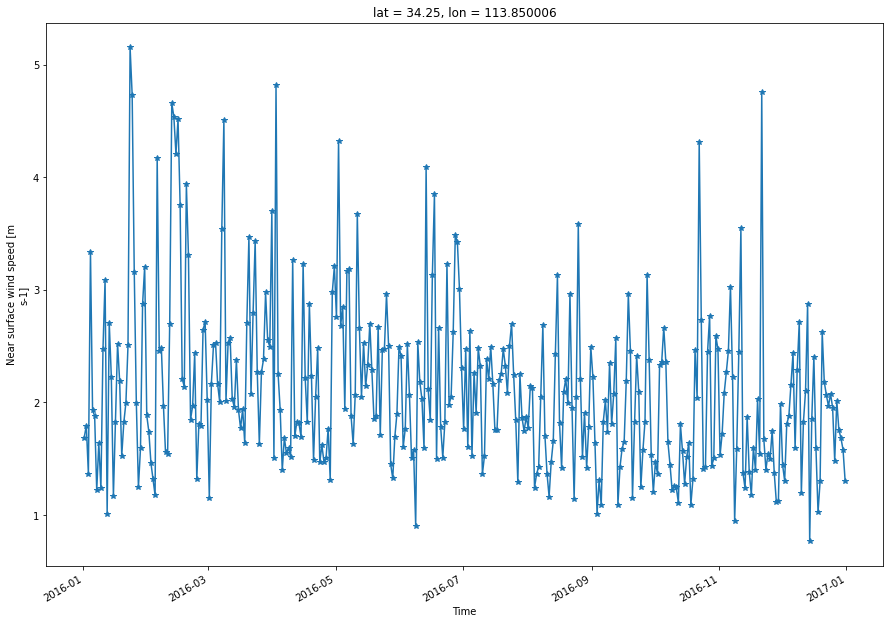

In [24]:
#fig.4 plot a specific position 
ds.wind.sel(lon=113.9, lat=34.3, method='nearest').plot(marker="*", size=10)
plt.show()

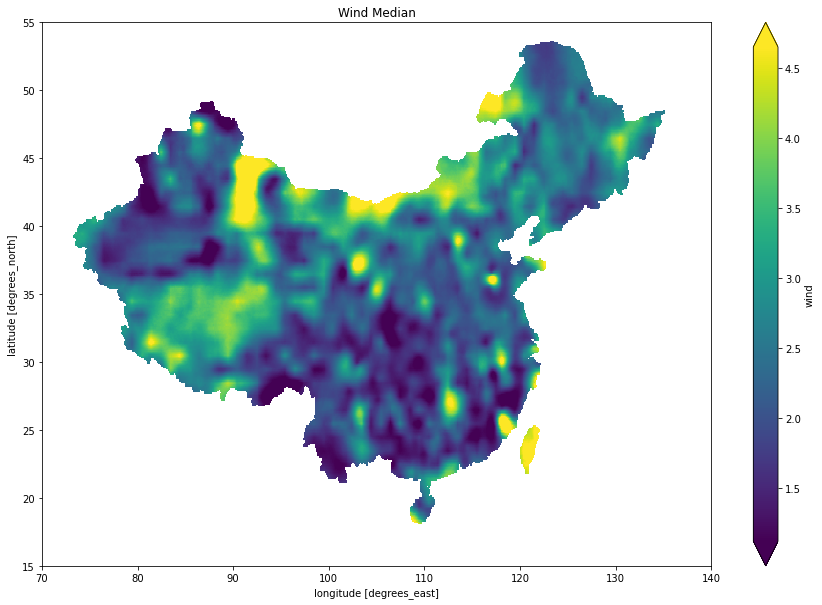

In [25]:
#fig.5
ds.wind.median(dim='time').plot(size=10, robust=True)
plt.title('Wind Median')
plt.show()

## Instruction:

### 1, For problem 1, thank Zelin Mai, Yunqiu Zhou and Meixue Mao, who explained the concepts to me, anomaly for example. 
### 2, For problem 2, thank Yunqiu Zhou who explained the concepts and process to me.
### 3, For problem 3, thank Wenfu Sun who taught me how to use "wget", also taught me how to merge files.
### Besides, it seems that errors would be displayed when a file was too large. 